<div style="color:white;background-color:black;border:5px solid powderblue;border-radius:25px;text-align:center;font-family:Copperplate">
    <h1>DATA DECISION PATHS</h1><hr style="border:2px solid powderblue">
    <div style="color:white;background-color:black;border-radius:25px;text-align:right;">
        <br>
        <h2 style="color:red;display:inline;">NAME:</h2><h2 style="display:inline;">Mohamadh Irfan</h2><br>
        <h2 style="color:red;display:inline;">BATCH:</h2><h2 style="display:inline;padding-right:62px;">AI-ELITE-7</h2>
    </div>
    <div style="color:white;background-color:black;border-radius:25px;text-align:Left;font-family:Courier New;margin-left:4%;">
        <h3 style="color:white;font-weight:bold;font-family:Papyrus">Data Description:</h3>
        <p style="padding-left:8%;padding-right:8%;">
        - The dataset consists of three columns and 100 rows which includes two feature columns and one label column.<br>
        - Features columns are in the form of float and continuous values ranges from <strong>[0.930868		 to 3.108743			]</strong> and <strong>[1.855540 to 3.892678 ]</strong> and the means are at <strong>[0.930868	and 1.855540	]</strong>.<br>
         - Whereas label is in the form discreate numerical integer values that inclueds <strong>[0 and 1]</strong>. 50% of the data consists of 0 and rest consists of 1 as labels.<br>
            - There are zero duplicates and no null values consists in the dataset.<br>
            <strong>-</strong> Pattern that is formed by the input features is <strong>linearsep shape</strong>. The dataset consists of data points that are labelled as 0 and 1 and that are separable linearly.
            <img src=https://cdn.discordapp.com/attachments/1060498631981023282/1109937966266200154/image.png
                 >
        </p>
        <br>
    </div>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv("4.linearsep.csv",header=None)

In [3]:
df.head()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [4]:
df.duplicated().sum()


0

In [5]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [6]:

num=df.select_dtypes(include='number')


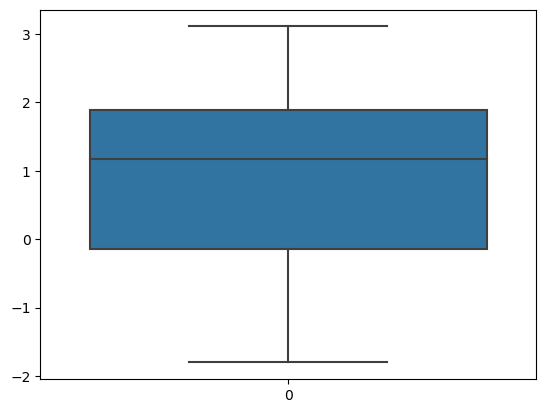

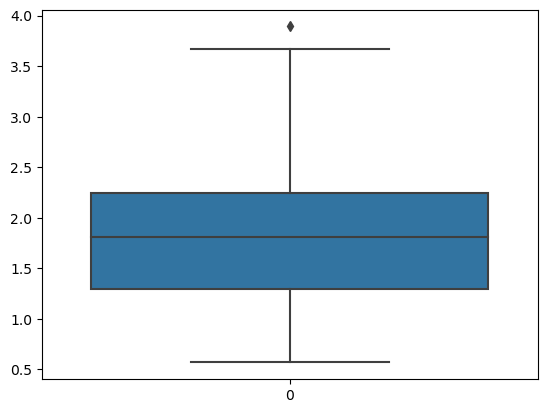

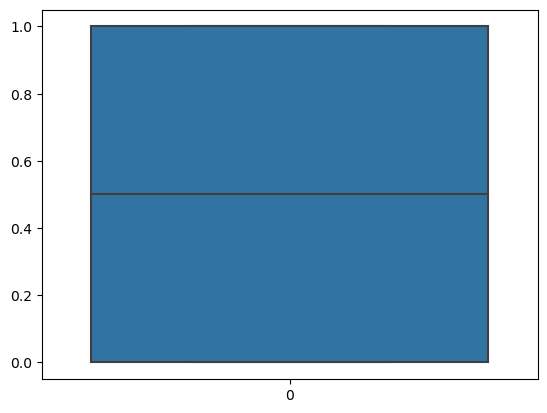

In [7]:
for i in num:
    sns.boxplot(num[i])
    plt.show()

In [8]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,0.930868,1.855540,0.500000
std,1.248367,0.713457,0.502519
min,-1.801737,0.568025,0.000000
25%,-0.143369,1.296152,0.000000
50%,1.171946,1.806731,0.500000
75%,1.881075,2.249652,1.000000
max,3.108743,3.892678,1.000000


In [9]:
df[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[[0,1]],df[2],test_size=0.1,random_state=42)

In [11]:
X_train.shape, X_test.shape

((90, 2), (10, 2))

In [12]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_trains = scale.fit_transform(X_train)
X_tests = scale.transform(X_test)

In [13]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [276]:
model = Sequential()
model.add(Dense(8,activation="relu",kernel_initializer="he_normal",input_dim=2))

model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(6,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.1))
model.add(Dense(5,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.1))
model.add(Dense(3,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.1))
model.add(Dense(2,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.1))


model.add(Dense(1,activation="sigmoid"))

In [277]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 8)                 24        
                                                                 
 dense_165 (Dense)           (None, 7)                 63        
                                                                 
 dense_166 (Dense)           (None, 6)                 48        
                                                                 
 dropout_60 (Dropout)        (None, 6)                 0         
                                                                 
 dense_167 (Dense)           (None, 5)                 35        
                                                                 
 dropout_61 (Dropout)        (None, 5)                 0         
                                                                 
 dense_168 (Dense)           (None, 3)               

In [278]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [279]:
history = model.fit(X_trains,y_train,epochs=75,batch_size=10,validation_split=0.1)

Epoch 1/75
9/9 [==============================] - 4s 67ms/step - loss: 1.6398 - accuracy: 0.5432 - val_loss: 1.8263 - val_accuracy: 0.2222
Epoch 2/75
9/9 [==============================] - 0s 12ms/step - loss: 1.2824 - accuracy: 0.5062 - val_loss: 1.4905 - val_accuracy: 0.2222
Epoch 3/75
9/9 [==============================] - 0s 11ms/step - loss: 1.0012 - accuracy: 0.4691 - val_loss: 1.2329 - val_accuracy: 0.1111
Epoch 4/75
9/9 [==============================] - 0s 12ms/step - loss: 0.9925 - accuracy: 0.5679 - val_loss: 1.0442 - val_accuracy: 0.2222
Epoch 5/75
9/9 [==============================] - 0s 11ms/step - loss: 0.9543 - accuracy: 0.5432 - val_loss: 0.9164 - val_accuracy: 0.3333
Epoch 6/75
9/9 [==============================] - 0s 11ms/step - loss: 0.7819 - accuracy: 0.4815 - val_loss: 0.8119 - val_accuracy: 0.3333
Epoch 7/75
9/9 [==============================] - 0s 12ms/step - loss: 1.0074 - accuracy: 0.4198 - val_loss: 0.7123 - val_accuracy: 0.6667
Epoch 8/75
9/9 [===========

In [280]:
model.get_weights()

[array([[ 0.00604197, -0.03913173,  0.63192946, -1.0668191 ,  0.94355804,
         -0.34095964, -1.5260434 ,  1.2677449 ],
        [ 1.8598129 ,  0.5632925 ,  1.5017384 ,  1.305071  ,  0.32220283,
          1.1037427 , -0.2685156 ,  0.32851478]], dtype=float32),
 array([-0.04187199,  0.04894385, -0.07678239,  0.03913236,  0.03725367,
         0.00305384,  0.42309934, -0.09274577], dtype=float32),
 array([[ 0.23348285, -0.10358595,  0.6311973 ,  0.83370215, -0.17851228,
          0.08853905, -0.2336946 ],
        [-0.06007935, -0.67083526,  0.21928263,  0.00706086, -0.17158575,
          0.7448666 , -0.24203664],
        [ 0.92555416, -0.12928936, -1.0416069 ,  0.39998809,  0.8541082 ,
          0.01419416,  1.0284824 ],
        [-0.8164105 , -0.519561  ,  0.551693  , -0.56780887,  0.8002726 ,
         -0.27368736,  0.6156905 ],
        [ 0.41731068,  0.32619107,  0.42145422,  0.6650826 , -0.50106066,
          1.0835943 ,  0.03261514],
        [-0.1551868 , -0.2891531 ,  0.38937947, -1

In [281]:
y_cap=model.predict(X_tests)

1/1 [==============================] - 0s 195ms/step


In [282]:
y_capf=np.where(y_cap>0.5,1,0)

In [283]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

1.0

In [284]:
data = np.array([history.history["loss"],history.history["val_loss"]])
# data = data.reshape(50,2)
[[data[:,0].max(),data[:,1].max()]]

[[1.8263344764709473, 1.4904910326004028]]

In [285]:
import matplotlib.pyplot as plt

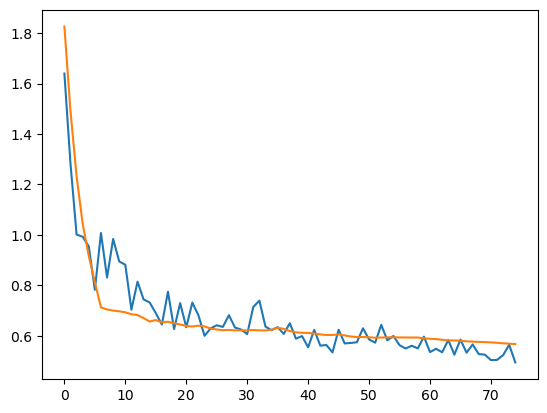

In [286]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

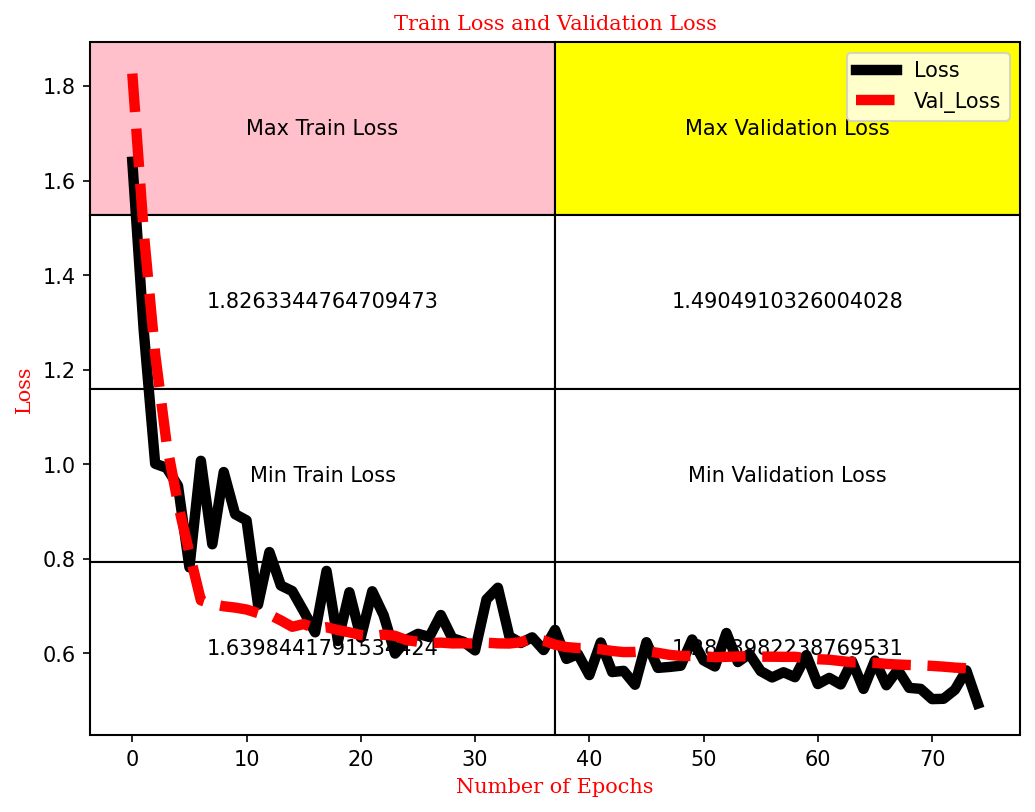

In [287]:
plt.figure(figsize=(8,6),dpi=150)
plt.plot(history.history["loss"],'black',linewidth=5)
plt.plot(history.history["val_loss"],'r--',linewidth=5)
plt.table(cellText=[[data[:,0].max(),data[:,1].max()],["Min Train Loss","Min Validation Loss"],[data[:,0].min(),data[:,1].min()]],cellLoc='center',colWidths=[0.4,0.4,0.4],
         colLabels=['Max Train Loss','Max Validation Loss'],colColours=['pink','yellow'],bbox=[0,0,1,1])
plt.legend(["Loss","Val_Loss"])
plt.title("Train Loss and Validation Loss",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("Number of Epochs",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("Loss",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [288]:
from mlxtend.plotting import plot_decision_regions as pt

15000/15000 [==============================] - 36s 2ms/step


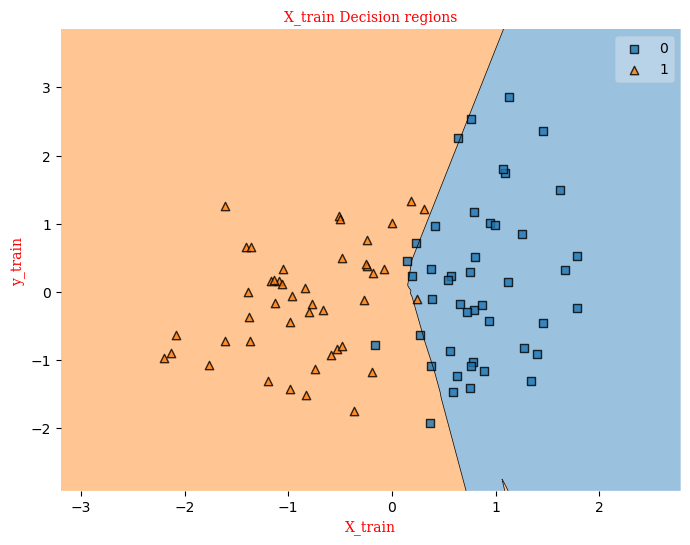

In [289]:
plt.figure(figsize=(8,6))
pt(X_trains,y_train.values.astype(int),clf=model)
plt.title("X_train Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_train",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_train",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [290]:
y_pred = model.predict(X_tests)

1/1 [==============================] - 0s 49ms/step


In [291]:
y_predf = np.array([1 if x>0.5 else 0 for x in y_pred])

15000/15000 [==============================] - 37s 2ms/step


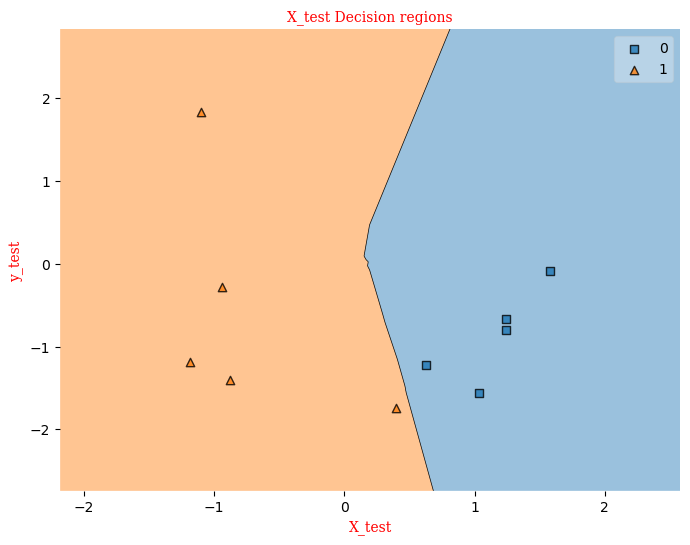

In [292]:
plt.figure(figsize=(8,6))
pt(X_tests,y_predf.astype(int),clf=model)
plt.title("X_test Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_test",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_test",color='red',fontsize='medium',fontfamily='serif')
plt.show()